# First Data_preprocessing

In [ ]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
   

In [ ]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,0,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,1
2,1,0,0,1,0,1,1,1,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dress       5 non-null      int64
 1   Earrings    5 non-null      int64
 2   Hat         5 non-null      int64
 3   Heels       5 non-null      int64
 4   Necklace    5 non-null      int64
 5   Pants       5 non-null      int64
 6   Sandals     5 non-null      int64
 7   Scarf       5 non-null      int64
 8   Shirt       5 non-null      int64
 9   Skirt       5 non-null      int64
 10  Sneakers    5 non-null      int64
 11  Sunglasses  5 non-null      int64
dtypes: int64(12)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.400000,0.400000,0.600000,0.400000,0.200000,0.800000,0.200000,0.800000,0.200000,0.600000,0.400000,0.200000
std,0.547723,0.547723,0.547723,0.547723,0.447214,0.447214,0.447214,0.447214,0.447214,0.547723,0.547723,0.447214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Viz

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


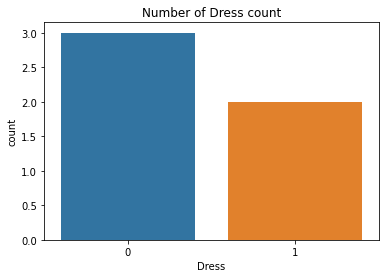

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.Dress,order=df.Dress.value_counts().index);
plt.title("Number of Dress count");

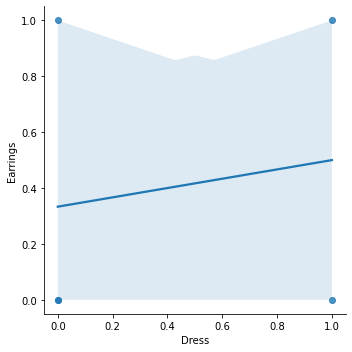

In [ ]:
sns.lmplot(x='Dress',y='Earrings',data=df)

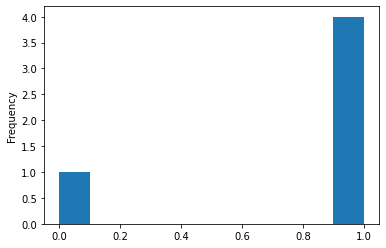

In [ ]:
df["Pants"].plot.hist()

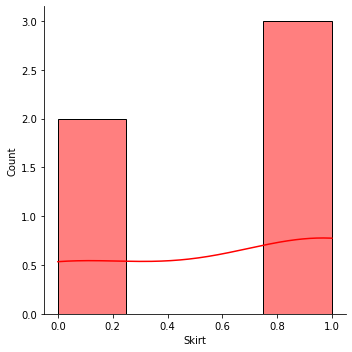

In [ ]:
sns.displot(df["Skirt"],kde=True,color="red")

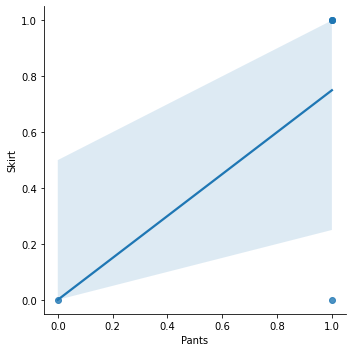

In [ ]:
sns.lmplot(x='Pants',y='Skirt',data=df)

## Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori
#support with column names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [ ]:
#support with column names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


* Confidencefor{Scarf→Pants}==0.75

=> 75% of the Purchases containing Scarf have Pants

This means that we have a 0.75 chance to buy Pants after buying Scarf.

* same thing for Confidencefor{Pants→Scarf}==0.75 chance to buy Scarf after buying Pants

* Confidencefor{Skirt→Pants}==1

=> 100% of the Purchases containing Skirt have Pants

This means that we have a 1 chance to buy Pants after buying Skirt.

* Confidencefor{Pants→Skirt}==0.75 chance to buy Skirt after buying Pants.

From the observations we have made, we can pack the skirt and pants together as weell as scarf and pants.






In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


Lift(Skirt→Pants)==1.25 >1 

=> it's more likely to buy skirt and pants rather than buying skirt alone.

This confirms our last strategy to put the skirt and pants together.

# Second Data

In [26]:
import pandas as pd
data=pd.read_csv("Market_Basket_Optimisation (1).csv", header=None)
data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [28]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [55]:
# create all items to array
list_all_item = []
for i in range(0, 7501):
    list_all_item.append([str(data.values[i,j]) for j in range(0, 20)])

# create a frequent items (dataframe) with Transaction Encoder
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te.fit(list_all_item)
dat = te.transform(list_all_item)
dat = pd.DataFrame(dat, columns = te.columns_)
dat

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets= apriori(dat, min_support = 0.01, use_colnames = True)

In [56]:
## Create association rules for each itemset (frequent_itemsets)
### Metric to evaluate if a rule is of interest. I using "Lift"

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)

## Handle mising values for consequents columns
index_to_drop_cons = rules[rules['consequents'] == frozenset({'nan'})].index
rules.drop(index_to_drop_cons,inplace=True)

## Handle mising values for antecedents columns
index_to_drop_ante = rules[rules['antecedents'] == frozenset({'nan'})].index
rules.drop(index_to_drop_ante,inplace=True)

In [57]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1646,"(ground beef, eggs)","(mineral water, nan)",0.019997,0.238235,0.010132,0.506667,2.126752,0.005368,1.544118
890,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1641,"(ground beef, nan, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1724,"(milk, ground beef, nan)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
1255,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
...,...,...,...,...,...,...,...,...,...
1686,"(mineral water, nan)","(spaghetti, french fries)",0.238235,0.027596,0.010132,0.042529,1.541125,0.003558,1.015596
891,(mineral water),"(ground beef, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507
1690,(mineral water),"(spaghetti, french fries, nan)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571
1648,(mineral water),"(ground beef, nan, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507


In [58]:
# Function to change antecendents and consequents to list from immutable 
new_cons = []
for item in rules['consequents']:
    a = list(item)
    new_cons.append(', '.join(a))

new_ante = []
for item in rules['antecedents']:
    a = list(item)
    new_ante.append(', '.join(a))
    
# Apply list to each columns antecedents & consequents 
rules['antecedents'] = new_ante
rules['consequents'] = new_cons

# Drop missing values for each columns consequents & antecedents
index_to_drop_cons = rules[rules['consequents'].str.contains('nan')].index
rules.drop(index_to_drop_cons,inplace=True)

index_to_drop_ante= rules[rules['antecedents'].str.contains('nan')].index
rules.drop(index_to_drop_ante,inplace=True)

rules.reset_index(drop=True,inplace=True)

In [59]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"ground beef, eggs",mineral water,0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1,"milk, ground beef",mineral water,0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
2,"ground beef, chocolate",mineral water,0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
3,"milk, frozen vegetables",mineral water,0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
4,soup,mineral water,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
...,...,...,...,...,...,...,...,...,...
421,mineral water,red wine,0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584
422,mineral water,"spaghetti, olive oil",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041
423,mineral water,cereals,0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115
424,mineral water,"ground beef, eggs",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507


From the result, the lift of an association rule “if ground beef & eggs then mineral water” is 2.12 because the confidence is 50% (the highest confidence for this dataset). This means that consumers who purchase ground beef & eggs are 2.12 times more likely to purchase mineral water than randomly chosen customers. Larger lift means more interesting rules. Association rules with high support are potentially interesting rules. Similarly, rules with high confidence would be interesting rules as well. So, you can take the conclusion with the highest the three parameters in that association rules.